In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [4]:
df.dtypes

name                             object
date_of_event                    object
age                             float64
citizenship                      object
event_location                   object
event_location_district          object
event_location_region            object
date_of_death                    object
gender                           object
took_part_in_the_hostilities     object
place_of_residence               object
place_of_residence_district      object
type_of_injury                   object
ammunition                       object
killed_by                        object
notes                            object
dtype: object

In [6]:
df.shape

(11124, 16)

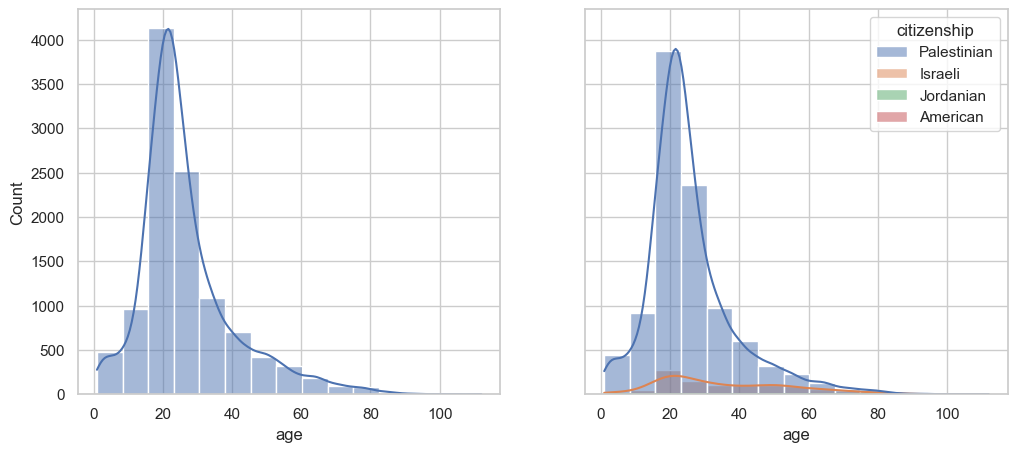

In [42]:
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
sns.set(
    style='whitegrid',
    font_scale=1
)
sns.histplot(ax=axs[0], x=df['age'], kde=True, bins=15)
sns.histplot(ax=axs[1], x=df['age'], hue=df['citizenship'], kde=True, bins=15)
plt.show()

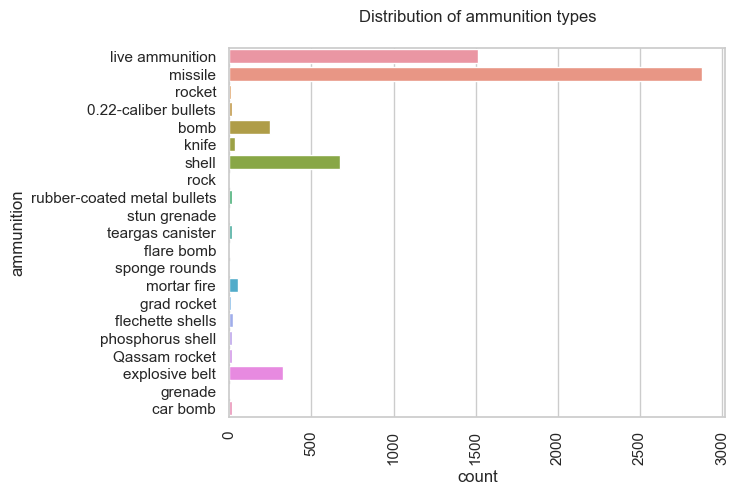

In [49]:
sns.countplot(data=df, y='ammunition')
plt.title('Distribution of ammunition types\n')
plt.xticks(rotation=90)
plt.show()

In [54]:
fatalities_by_region = df.groupby('event_location_region')['name'].count()
fatalities_by_region

event_location_region
Gaza Strip    7733
Israel         679
West Bank     2712
Name: name, dtype: int64

In [71]:
fatalities_citizenship = df.groupby('event_location_region', as_index=False)['citizenship'] \
                           .value_counts() \
                           .pivot(columns='citizenship', index='event_location_region', values='count').fillna(0)
fatalities_citizenship

citizenship,American,Israeli,Jordanian,Palestinian
event_location_region,,,,
Gaza Strip,0.0,186.0,1.0,7546.0
Israel,0.0,551.0,1.0,127.0
West Bank,1.0,292.0,0.0,2419.0


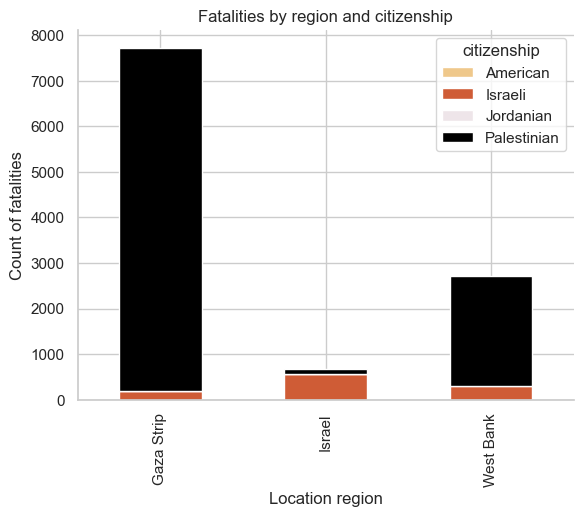

In [84]:
fatalities_citizenship.plot(kind='bar', stacked=True,color=['#efc88b','#cf5c36', '#eee5e9', '#000000'])
plt.xlabel('Location region')
plt.ylabel('Count of fatalities')
plt.title('Fatalities by region and citizenship')
sns.despine()

<Axes: xlabel='citizenship'>

<Figure size 1500x1000 with 0 Axes>

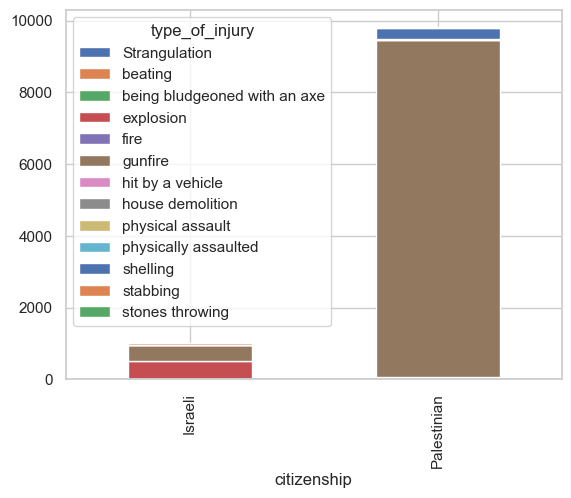

In [96]:
injury_by_citizenship = df[df.citizenship.isin(['Israeli','Palestinian'])].groupby('citizenship', as_index=False)['type_of_injury'] \
                          .value_counts() \
                          .pivot(index='citizenship',columns='type_of_injury',values='count') \
                          .fillna(0)
plt.figure(figsize=(15,10))
injury_by_citizenship.plot(kind='bar', stacked=True)

In [113]:
gender_by_citizenship = df[df.citizenship.isin(['Israeli','Palestinian'])].groupby('citizenship', as_index=False)['gender'].value_counts()
gender_by_citizenship

,citizenship,gender,count
0,Israeli,M,698
1,Israeli,F,331
2,Palestinian,M,8981
3,Palestinian,F,1091


<Axes: xlabel='citizenship', ylabel='count'>

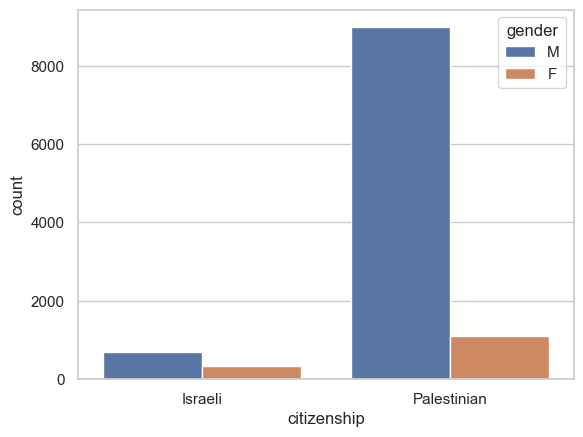

In [122]:
sns.barplot(x='citizenship',y='count', hue='gender', data=gender_by_citizenship)